In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [4]:
!pwd

/c/Users/Amber/Desktop/DataSciCourse/exercises/dataframes_subplots/code/starter-code


In [5]:
path = 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
df = pd.read_csv(path, index_col=0)

# The dataset describes advertising dollars spend in each venue (TV, Radio, Newspaper)
# and the corresponding Sales

In [6]:
# Print out the dataframe schema (data dictionary)
df.shape

(200, 4)

In [27]:
type(df)
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [28]:
# Are there any null values? If so, should we filter out, all, or some? 
df.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [29]:
# Print out summary statistics of the dataframe
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [30]:
# show the first 10 rows of the dataframe
df.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [15]:
# how many rows in the dataframe, if you did filter or did not filter?
# Do not use count!. Hint. Look into shape on a dataframe object
df.shape

(200, 4)

In [32]:
# What was the sum of all Sales when spent on Radio was greater than or equal to 10K? 

df2 = df[ df.Radio >= 10 ]
df2.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
12,214.7,24.0,4.0,17.4
13,23.8,35.1,65.9,9.2


In [39]:
totalRadio = sum(df2.Sales)
print totalRadio

2280.9


In [12]:
# create a fourth column in the dataFrame, called All, that symbolizes all advertising dollars spent
# You must use an apply. i.e. df['All'] = df.apply(someFunction, axis = 1)
# When you do axis = 1 you tell it to map line by line instead of column through the entire df

def totalAdvertising(row):
    tv = row[0]
    radio = row[1]
    np = row[2]
    
    return tv + radio + np

# def totalAdvertising(table):
#     return table[0] + table[1] + table[2]

df["Total"] = df.apply(totalAdvertising, axis = 1)
df.head(10)

,TV,Radio,Newspaper,Sales,Total
1,230.1,37.8,69.2,22.1,337.1
2,44.5,39.3,45.1,10.4,128.9
3,17.2,45.9,69.3,9.3,132.4
4,151.5,41.3,58.5,18.5,251.3
5,180.8,10.8,58.4,12.9,250.0
6,8.7,48.9,75.0,7.2,132.6
7,57.5,32.8,23.5,11.8,113.8
8,120.2,19.6,11.6,13.2,151.4
9,8.6,2.1,1.0,4.8,11.7
10,199.8,2.6,21.2,10.6,223.6


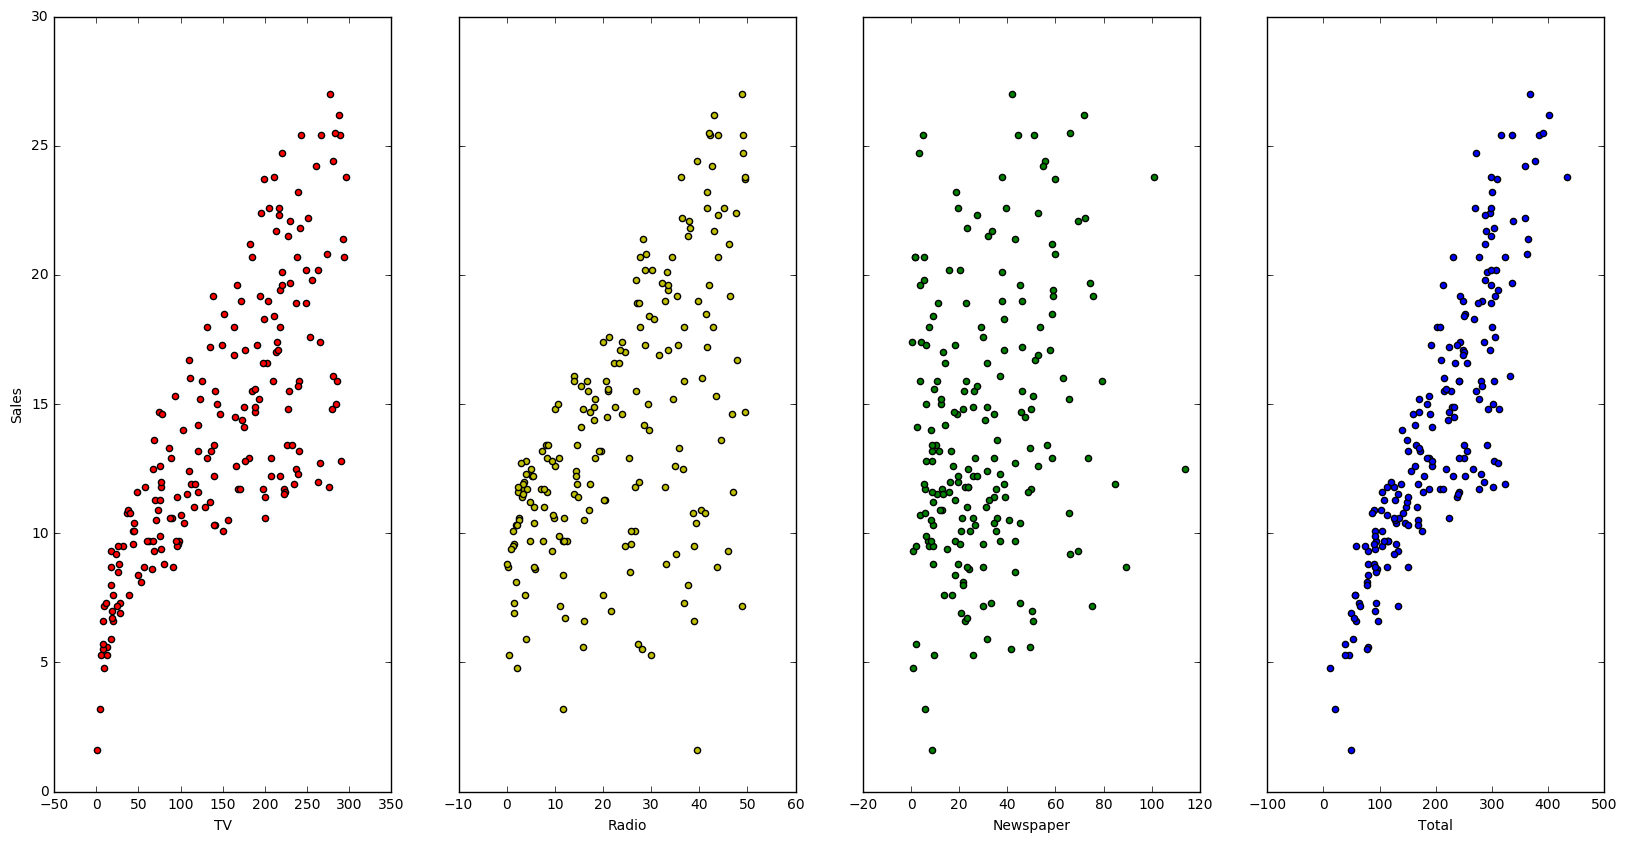

In [56]:
# Create 4 Scatter Plots

# 1. TV Spend Vs Sales (x = TV Spend, y = Sales)
# 2. Radio Spend Vs Sales ( x = Radio Spend, y = Sales )
# 3. Newspaper Spend Vs Sales ( x = Newspaper Spend, y = Sales )
# 4. All Advertisting Spend Vs. Sales ( x = All Advertising Spend, y = Sales )
# HINT: fig, axs = plt.subplots(1, 4, sharey=True), and then use df.plot 4 times
# with correct x and y labels and ax labels.

# What Conclusions can you make? i.e. more advertising dollars spent in TV, increases sales
# More than Radio Sales? 

fig,axs = plt.subplots(1,4, sharey= True)
df.plot(kind = "scatter", x = "TV", y = "Sales", ax=axs[0], figsize = (20,10), color = "r")
df.plot(kind = "scatter", x = "Radio", y = "Sales", ax=axs[1], color = "y")
df.plot(kind = "scatter", x = "Newspaper", y = "Sales", ax=axs[2], color = "g")
df.plot(kind = "scatter", x = "Total", y = "Sales", ax=axs[3], color = "b")